学习和测试数据增广库 ablumentations 的效果

In [9]:
import albumentations as A
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import json

max image count per patient:  71
min image count per patient:  1
average image count per patient:  28.86190476190476


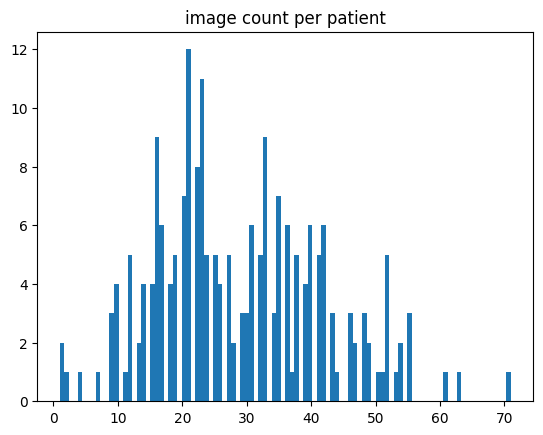

In [10]:
patient_data_json_path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/patient_data.json"
with open(patient_data_json_path, "r", encoding="utf-8") as f:
    patient_data = json.load(f)

image_count_per_patient = []
for patient_data in patient_data.values():
    image_count_per_patient.append(len(patient_data["img_path"]))

print("max image count per patient: ", max(image_count_per_patient))
print("min image count per patient: ", min(image_count_per_patient))
print("average image count per patient: ", np.mean(image_count_per_patient))
plt.hist(image_count_per_patient, bins=100)
plt.title("image count per patient")
plt.show()

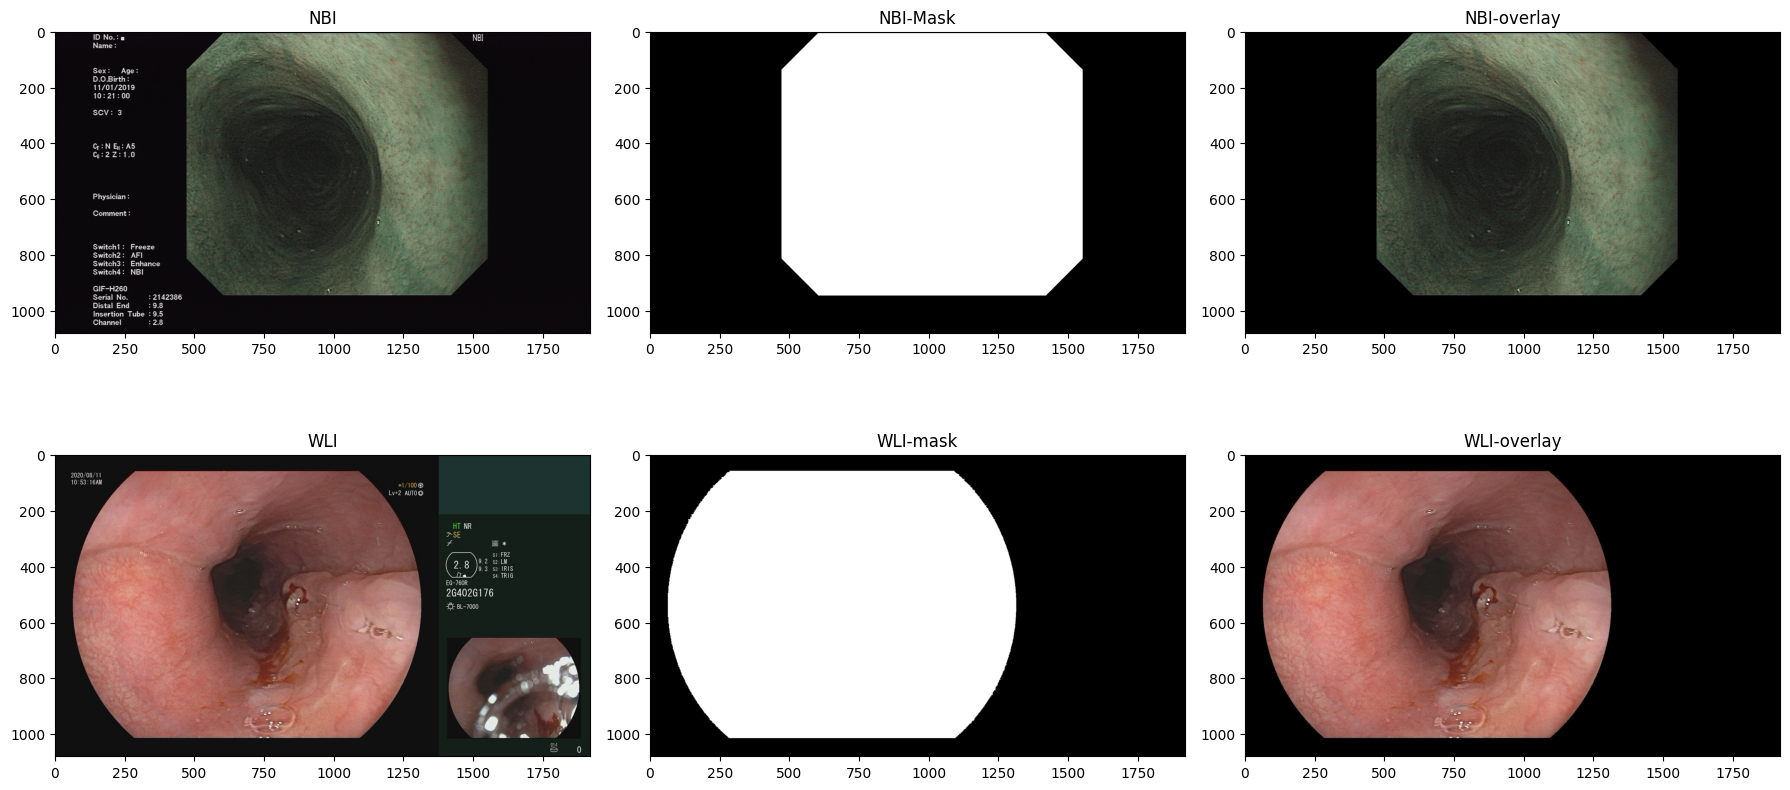

In [11]:
NBI_image_path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/PCR/NBI-PCR/6666846_B528EC15.jpg"
NBI_image_mask_path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/Mask/6666846_B528EC15.jpg"
WLI_image_path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/PCR/White-PCR/7892656_A0D2548E.jpg"
WLI_image_mask_path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/Mask/7892656_A0D2548E.jpg"
NBI_image = cv2.imread(NBI_image_path, cv2.IMREAD_COLOR)
NBI_mask = cv2.imread(NBI_image_mask_path, cv2.IMREAD_COLOR)
WLI_image = cv2.imread(WLI_image_path, cv2.IMREAD_COLOR)
WLI_mask = cv2.imread(WLI_image_mask_path, cv2.IMREAD_COLOR)
NBI_overlay = (NBI_image * np.where(NBI_mask>0, 1, 0)).astype(np.uint8)
WLI_overlay = (WLI_image * np.where(WLI_mask>0, 1, 0)).astype(np.uint8)

plt.figure(figsize=(18, 9))
plt.subplot(231)
plt.imshow(cv2.cvtColor(NBI_image, cv2.COLOR_BGR2RGB))
plt.title("NBI")
plt.subplot(232)
plt.imshow(cv2.cvtColor(NBI_mask, cv2.COLOR_BGR2RGB))
plt.title("NBI-Mask")
plt.subplot(233)
plt.imshow(cv2.cvtColor(NBI_overlay, cv2.COLOR_BGR2RGB))
plt.title("NBI-overlay")
plt.subplot(234)
plt.imshow(cv2.cvtColor(WLI_image, cv2.COLOR_BGR2RGB))
plt.title("WLI")
plt.subplot(235)
plt.imshow(cv2.cvtColor(WLI_mask, cv2.COLOR_BGR2RGB))
plt.title("WLI-mask")
plt.subplot(236)
plt.imshow(cv2.cvtColor(WLI_overlay, cv2.COLOR_BGR2RGB))
plt.title("WLI-overlay")
plt.tight_layout()

In [12]:
NBI_image = cv2.cvtColor(NBI_image, cv2.COLOR_BGR2RGB)
WLI_image = cv2.cvtColor(WLI_image, cv2.COLOR_BGR2RGB)
NBI_overlay = cv2.cvtColor(NBI_overlay, cv2.COLOR_BGR2RGB)
WLI_overlay = cv2.cvtColor(WLI_overlay, cv2.COLOR_BGR2RGB)

In [13]:
# 根据mask获取内镜图像区域的最小外接矩形(水平竖直的)的中心点与w和h
def mask2bounding_rect(mask):
    gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 1:
        return 0, 0, 0, 0
    cont = contours[0]
    x, y, w, h = cv2.boundingRect(cont)
    return x, y, w, h
        


In [14]:
# 遍历mask，统计内镜图像区域的外接矩形的宽高分别是多少
"""Mask_Folder_Path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/Mask"
width_list = []
height_list = []
for mask_name in os.listdir(Mask_Folder_Path):
    if not mask_name.endswith(".jpg"):
        continue
    mask = cv2.imread(os.path.join(Mask_Folder_Path, mask_name), cv2.IMREAD_COLOR)
    x, y, w, h = mask2bounding_rect(mask)
    if x+y+w+h == 0:
        print(mask_name)
    else:
        width_list.append(w)
        height_list.append(h)

width_array = np.array(width_list)
print("Width min: {}, max: {}, mean: {}".format(width_array.min(), width_array.max(), width_array.mean()))
height_array = np.array(height_list)
print("Height min: {}, max: {}, mean: {}".format(height_array.min(), height_array.max(), height_array.mean()))"""

'Mask_Folder_Path = "/mnt/nasv2/hhz/Esophageal-Cancer/Esophageal-Cancer-Dataset/Mask"\nwidth_list = []\nheight_list = []\nfor mask_name in os.listdir(Mask_Folder_Path):\n    if not mask_name.endswith(".jpg"):\n        continue\n    mask = cv2.imread(os.path.join(Mask_Folder_Path, mask_name), cv2.IMREAD_COLOR)\n    x, y, w, h = mask2bounding_rect(mask)\n    if x+y+w+h == 0:\n        print(mask_name)\n    else:\n        width_list.append(w)\n        height_list.append(h)\n\nwidth_array = np.array(width_list)\nprint("Width min: {}, max: {}, mean: {}".format(width_array.min(), width_array.max(), width_array.mean()))\nheight_array = np.array(height_list)\nprint("Height min: {}, max: {}, mean: {}".format(height_array.min(), height_array.max(), height_array.mean()))'

In [15]:
"""print(np.where(width_array>1250, 1, 0).sum())
print(np.where(height_array>1000, 1, 0).sum())

print((height_array>width_array).sum())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(width_array, bins=100, color='blue', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Width')

plt.subplot(1, 2, 2)
plt.hist(height_array, bins=100, color='green', alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

plt.tight_layout()
plt.show()
"""

"print(np.where(width_array>1250, 1, 0).sum())\nprint(np.where(height_array>1000, 1, 0).sum())\n\nprint((height_array>width_array).sum())\n\nplt.figure(figsize=(10, 5))\nplt.subplot(1, 2, 1)\nplt.hist(width_array, bins=100, color='blue', alpha=0.7)\nplt.xlabel('Width')\nplt.ylabel('Frequency')\nplt.title('Distribution of Width')\n\nplt.subplot(1, 2, 2)\nplt.hist(height_array, bins=100, color='green', alpha=0.7)\nplt.xlabel('Height')\nplt.ylabel('Frequency')\nplt.title('Distribution of Height')\n\nplt.tight_layout()\nplt.show()\n"

Text(0.5, 1.0, 'transformed-crop-WLI')

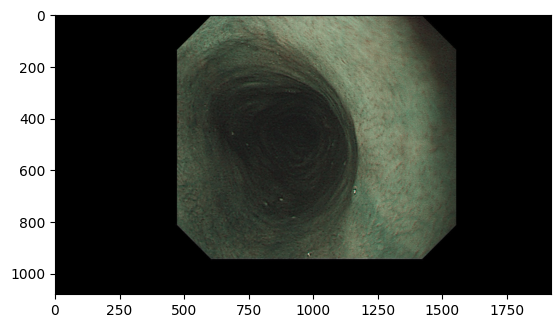

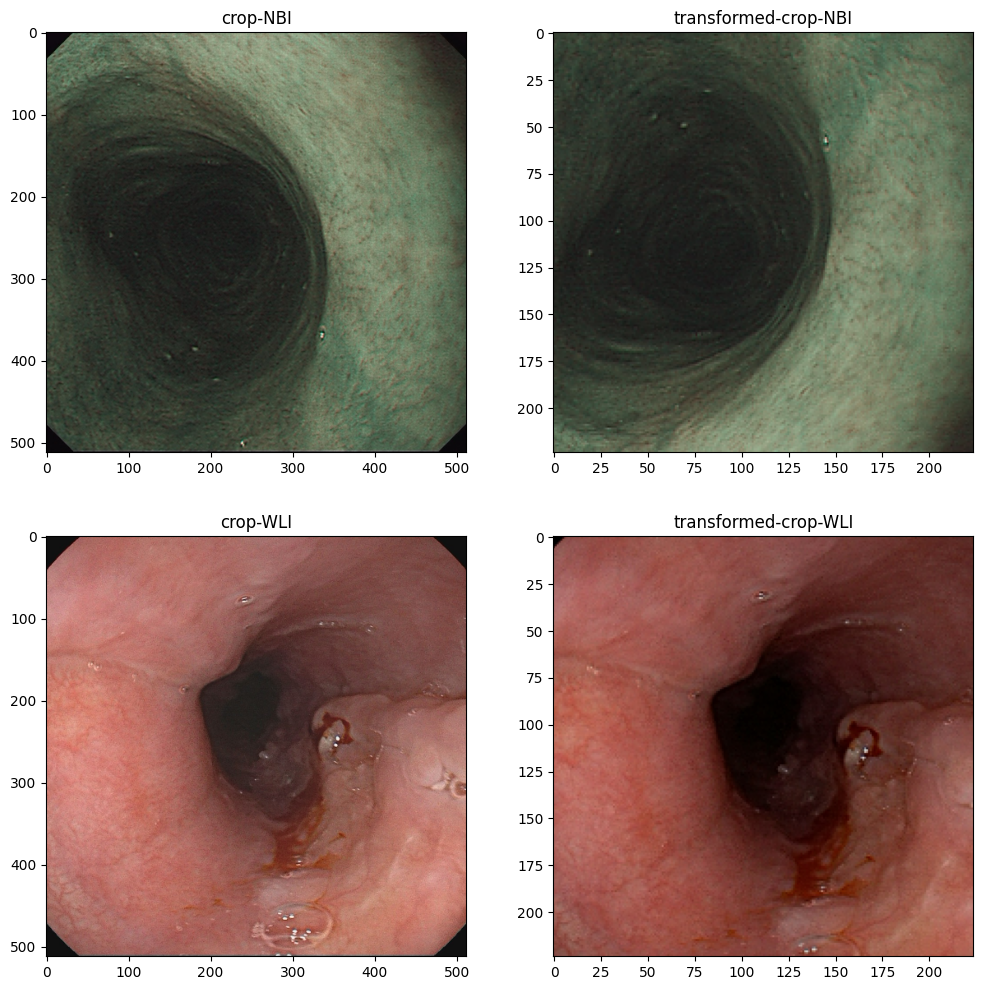

In [16]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomRotate90(p=0.5),
    A.RandomToneCurve(p=0.2),
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 0.8), ratio=(1.0, 1.0))
])
plt.imshow(NBI_overlay)
x, y, w, h = mask2bounding_rect(NBI_mask)
square_a = min(w, h)
x = x+w//2 - square_a // 2
y = y+h//2 - square_a // 2
crop_NBI = NBI_image[y:y+square_a, x:x+square_a]
crop_NBI = cv2.resize(crop_NBI.astype(np.uint8), (512,512))
x, y, w, h = mask2bounding_rect(WLI_mask)
square_a = min(w, h)
x = x+w//2 - square_a // 2
y = y+h//2 - square_a // 2
crop_WLI = WLI_image[y:y+square_a, x:x+square_a]
crop_WLI = cv2.resize(crop_WLI.astype(np.uint8), (512,512))
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(crop_NBI)
plt.title("crop-NBI")
plt.subplot(222)
plt.imshow(transform(image=crop_NBI)["image"])
plt.title("transformed-crop-NBI")
plt.subplot(223)
plt.imshow(crop_WLI)
plt.title("crop-WLI")
plt.subplot(224)
plt.imshow(transform(image=crop_WLI)["image"])
plt.title("transformed-crop-WLI")


Text(0.5, 1.0, 'augmented')

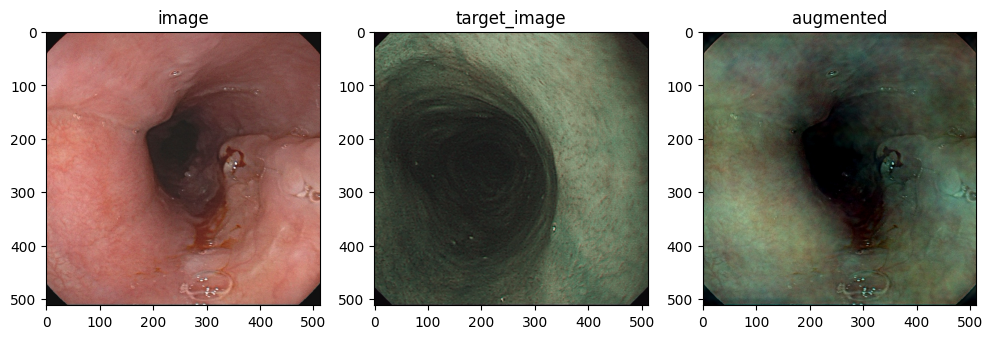

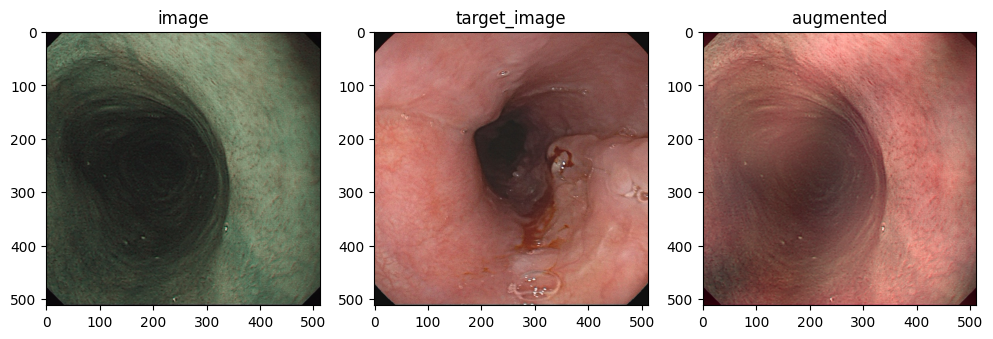

In [25]:
target_image = crop_NBI
image = crop_WLI
aug = A.Compose([A.FDA([target_image], p=1, read_fn=lambda x: x)])
augmented = aug(image=image)["image"]
# plot
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(image)
plt.title("image")
plt.subplot(132)
plt.imshow(target_image)
plt.title("target_image")
plt.subplot(133)
plt.imshow(augmented)
plt.title("augmented")
target_image = crop_WLI 
image = crop_NBI
aug = A.Compose([A.FDA([target_image], beta_limit=0.05, p=1, read_fn=lambda x: x)])
augmented = aug(image=image)["image"]
# plot
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(image)
plt.title("image")
plt.subplot(132)
plt.imshow(target_image)
plt.title("target_image")
plt.subplot(133)
plt.imshow(augmented)
plt.title("augmented")

Text(0.5, 1.0, 'augmented')

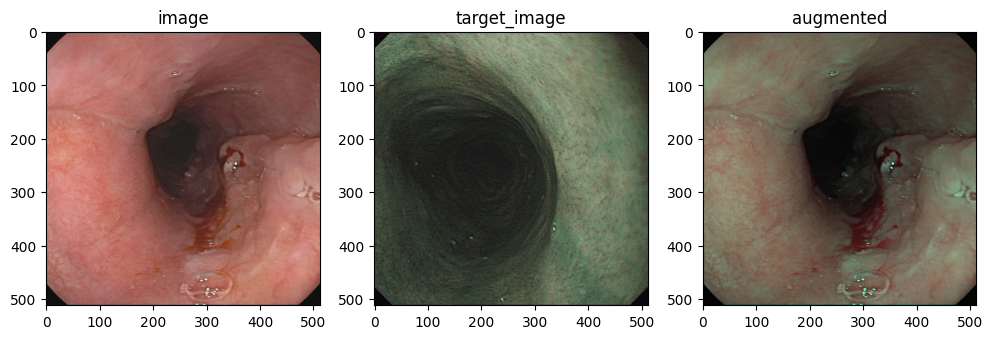

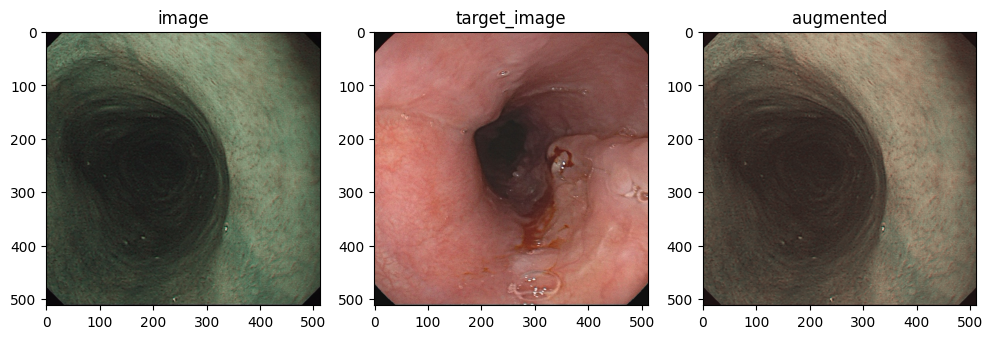

In [20]:
target_image = crop_NBI
image = crop_WLI
aug = A.Compose([A.PixelDistributionAdaptation([target_image], p=1, read_fn=lambda x: x)])
augmented = aug(image=image)["image"]
# plot
# plot
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(image)
plt.title("image")
plt.subplot(132)
plt.imshow(target_image)
plt.title("target_image")
plt.subplot(133)
plt.imshow(augmented)
plt.title("augmented")
target_image = crop_WLI
image = crop_NBI
aug = A.Compose([A.PixelDistributionAdaptation([target_image], p=1, read_fn=lambda x: x)])
augmented = aug(image=image)["image"]
# plot
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(image)
plt.title("image")
plt.subplot(132)
plt.imshow(target_image)
plt.title("target_image")
plt.subplot(133)
plt.imshow(augmented)
plt.title("augmented")